<a href="https://colab.research.google.com/github/DavidTorres-sys/proyecto-modelos-y-simulacion-udea/blob/main/exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def read_file(file='train.csv'):
    try:
        return pd.read_csv(file)
    except FileNotFoundError:
        print(f"Error: El archivo '{file}' no se encontró.")
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo: {e}")


In [39]:
df_train = read_file()
df_train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [40]:
df_train = df_train.dropna(axis=1, how='all')

In [41]:
df_train.describe()
df_train['PERIODO_ACADEMICO'].value_counts().head(10)



,count
PERIODO_ACADEMICO,
20195,180873
20203,171838
20212,171412
20183,164818
20194,1472
20213,1178
20202,490
20184,254
20196,165


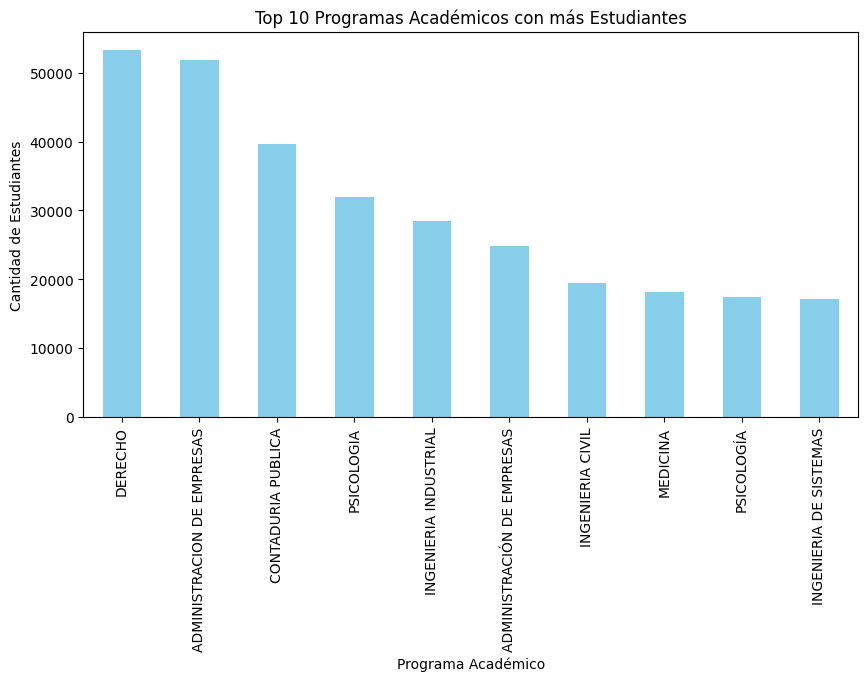

In [42]:
program_counts = df_train['E_PRGM_ACADEMICO'].value_counts().head(10)

program_counts.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Top 10 Programas Académicos con más Estudiantes')
plt.xlabel('Programa Académico')
plt.ylabel('Cantidad de Estudiantes')
plt.show()


Padres: F_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Name: count, dtype: int64
---------------------
Madres: F_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Name: count, dtype: int64


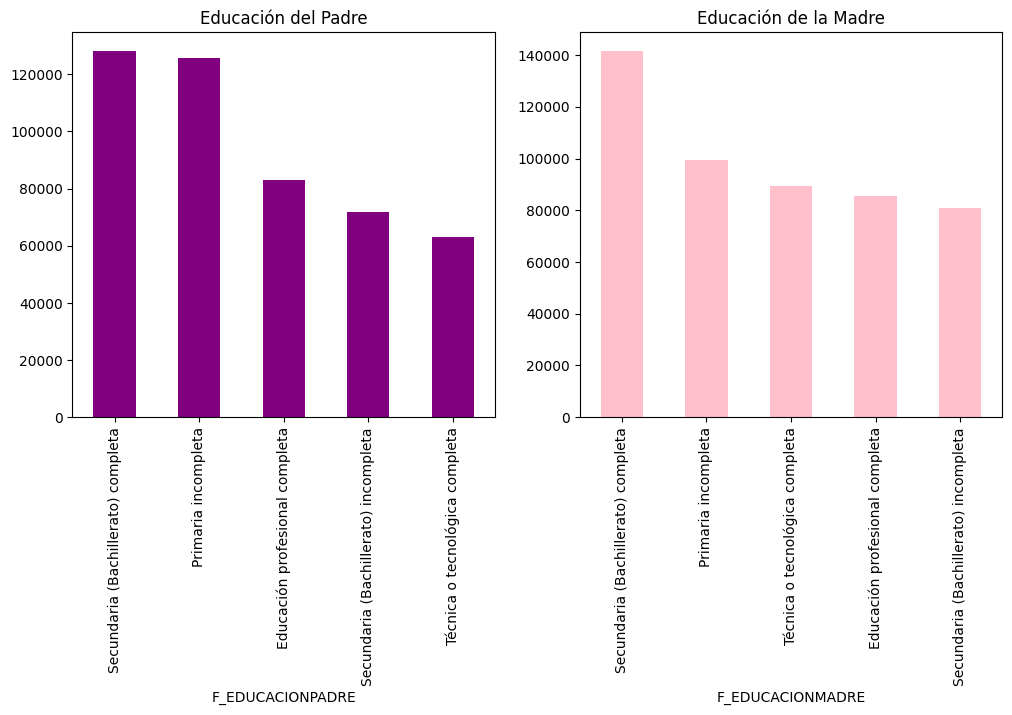

In [43]:
father_edu = df_train['F_EDUCACIONPADRE'].value_counts().head(5)
mother_edu = df_train['F_EDUCACIONMADRE'].value_counts().head(5)

print(f'Padres: {father_edu}')
print("---------------------")
print(f'Madres: {mother_edu}')

fig, ax = plt.subplots(1, 2, figsize=(12,5))
father_edu.plot(kind='bar', ax=ax[0], color='purple', title='Educación del Padre')
mother_edu.plot(kind='bar', ax=ax[1], color='pink', title='Educación de la Madre')
plt.show()


RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


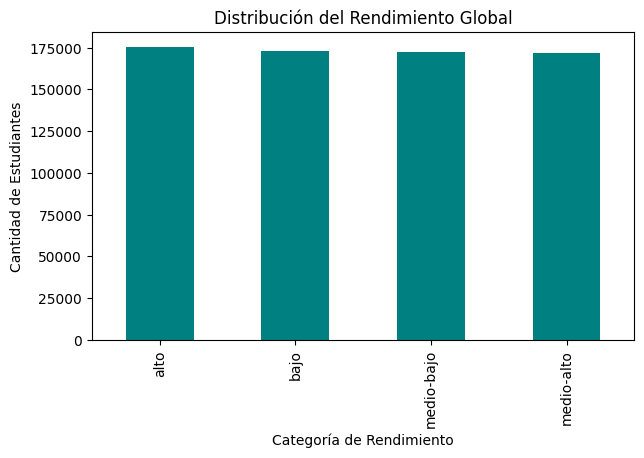

In [44]:
performance = df_train['RENDIMIENTO_GLOBAL'].value_counts()
print(performance)

# Gráfico
performance.plot(kind='bar', color='teal', figsize=(7,4))
plt.title('Distribución del Rendimiento Global')
plt.xlabel('Categoría de Rendimiento')
plt.ylabel('Cantidad de Estudiantes')
plt.show()


F_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


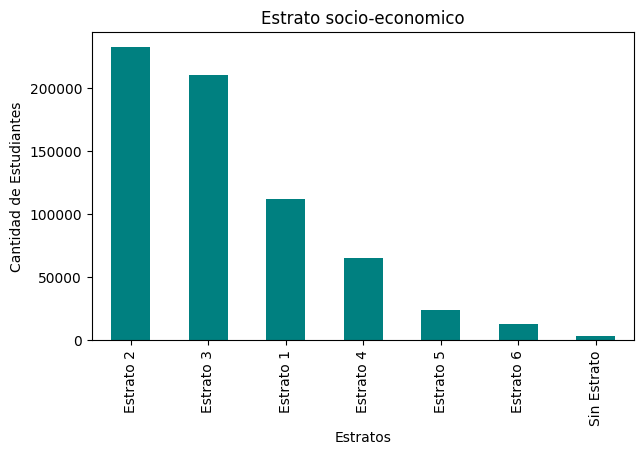

In [45]:
status = df_train['F_ESTRATOVIVIENDA'].value_counts()
print(status)

status.plot(kind='bar', color='teal', figsize=(7,4))
plt.title('Estrato socio-economico')
plt.xlabel('Estratos')
plt.ylabel('Cantidad de Estudiantes')
plt.show()


Acceso a computador (%):
 F_TIENECOMPUTADOR
Si    91.331409
No     8.668591
Name: proportion, dtype: float64

Acceso a internet (%):
 F_TIENEINTERNET
Si    88.983302
No    11.016698
Name: proportion, dtype: float64


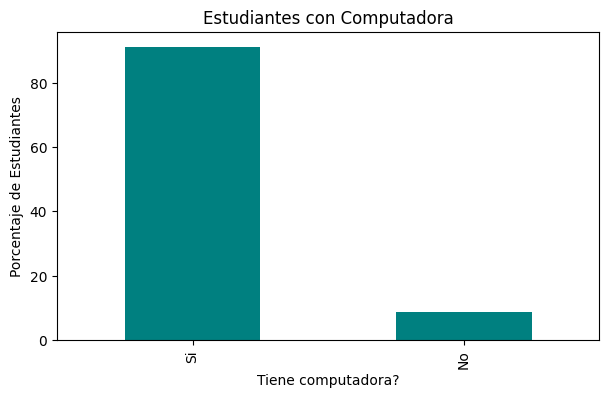

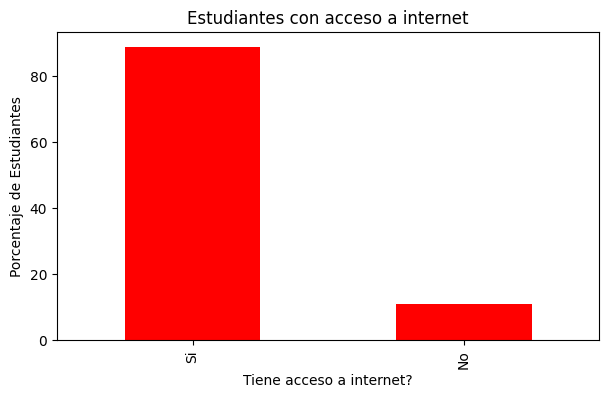

In [52]:
# Porcentaje que tiene computador e internet
pc_rate = df_train['F_TIENECOMPUTADOR'].value_counts(normalize=True) * 100
internet_rate = df_train['F_TIENEINTERNET'].value_counts(normalize=True) * 100

print("Acceso a computador (%):\n", pc_rate)
print("\nAcceso a internet (%):\n", internet_rate)

pc_rate.plot(kind='bar', color='teal', figsize=(7,4))
plt.title('Estudiantes con Computadora')
plt.xlabel('Tiene computadora?')
plt.ylabel('Porcentaje de Estudiantes')
plt.show()

internet_rate.plot(kind='bar', color='red', figsize=(7,4))
plt.title('Estudiantes con acceso a internet')
plt.xlabel('Tiene acceso a internet?')
plt.ylabel('Porcentaje de Estudiantes')
plt.show()
